# DpicNet

DpicNet a deep neural network aimed to achieve good performance on [Intel Multi-class Image Classification](https://www.kaggle.com/puneet6060/intel-image-classification). DpicNet is built by transfering learning procedure from Xception deep neural network and freezing the convolutional parts, which serves as a feature extractor. The top part of DpicNet is created by adding dense hidden layers forming fully-connected network and shaping to match the number of classes in [Intel Multi-class Image Classification](https://www.kaggle.com/puneet6060/intel-image-classification)

In [1]:
from model.model import DpicNet
from model.data import load_train_data, load_test_data, load_predict_data

In [2]:
train_data = load_train_data()
test_data = load_test_data()
hidden1_nodes = 256
hidden2_nodes = 32
model = DpicNet(train_data.image_shape, train_data.num_classes, (hidden1_nodes, hidden2_nodes), (None, None))
print(model)

Found 14034 images belonging to 6 classes.
Found 3000 images belonging to 6 classes.
Model: "DpicNet"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
xception (Model)             (None, 5, 5, 2048)        20861480  
_________________________________________________________________
flatten (Flatten)            (None, 51200)             0         
_________________________________________________________________
dense (Dense)                (None, 256)               13107456  
_________________________________________________________________
dense_1 (Dense)              (None, 32)                8224      
_________________________________________________________________
dense_2 (Dense)              (None, 6)                 198       
Total params: 33,977,358
Trainable params: 13,115,878
Non-trainable params: 20,861,480
_________________________________________________________________



In [9]:
model.fit(train_data, 10)

  ...
    to  
  ['...']
Train for 439 steps
Epoch 1/10
439/439 [==============================] - 17s 40ms/step - loss: 0.7723 - accuracy: 0.7590
Epoch 2/10
439/439 [==============================] - 12s 28ms/step - loss: 0.3895 - accuracy: 0.8669
Epoch 3/10
439/439 [==============================] - 12s 28ms/step - loss: 0.2822 - accuracy: 0.9015
Epoch 4/10
439/439 [==============================] - 12s 27ms/step - loss: 0.2205 - accuracy: 0.9220
Epoch 5/10
439/439 [==============================] - 12s 28ms/step - loss: 0.1826 - accuracy: 0.9384
Epoch 6/10
439/439 [==============================] - 13s 29ms/step - loss: 0.1295 - accuracy: 0.9555
Epoch 7/10
439/439 [==============================] - 12s 28ms/step - loss: 0.1031 - accuracy: 0.9648
Epoch 8/10
439/439 [==============================] - 12s 27ms/step - loss: 0.1051 - accuracy: 0.9656
Epoch 9/10
439/439 [==============================] - 12s 28ms/step - loss: 0.0784 - accuracy: 0.9730
Epoch 10/10
439/439 [================

In [10]:
model.evaluate(test_data)

  ...
    to  
  ['...']
94/94 [==============================] - 4s 43ms/step - loss: 0.8430 - accuracy: 0.8670


[0.8429700312937828, 0.867]

In [5]:
model.save('/project/cs542sp/DpicNet/src/saved_models/s3')

Instructions for updating:
If using Keras pass *_constraint arguments to layers.
INFO:tensorflow:Assets written to: /project/cs542sp/DpicNet/src/saved_models/s8/assets


In [2]:
from os import listdir
from os.path import isfile, join
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

images = [join('./data/predict/', f) for f in listdir('./data/predict/') if isfile(join('./data/predict/', f)) and f[-3:] == 'jpg']
pred_imgs = np.random.choice(np.array(images), 5)

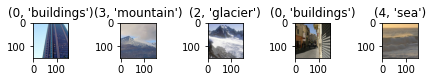

In [3]:
mod = DpicNet.load('/project/cs542sp/DpicNet/src/saved_models/s6')
_, ax = plt.subplots(1,pred_imgs.shape[0])
for i in range(pred_imgs.shape[0]):
    ax[i].title.set_text(str(mod.predict(load_predict_data(str(pred_imgs[i])))))
    ax[i].imshow(mpimg.imread(pred_imgs[i]))
plt.tight_layout()